In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/test'    # Update with your actual path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/horses')))
print(len(os.listdir('/content/drive/MyDrive/train/humans')))
print(len(os.listdir('/content/drive/MyDrive/test/horses')))
print(len(os.listdir('/content/drive/MyDrive/test/humans')))

500
486
128
128


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (horses vs. humans)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 789 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [8]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
25/25 [==============================] - 171s 7s/step - loss: 0.5855 - accuracy: 0.7681 - val_loss: 1.2565 - val_accuracy: 0.8200
Epoch 2/20
25/25 [==============================] - 148s 6s/step - loss: 0.1671 - accuracy: 0.9430 - val_loss: 1.4940 - val_accuracy: 0.8400
Epoch 3/20
25/25 [==============================] - 146s 6s/step - loss: 0.0750 - accuracy: 0.9721 - val_loss: 1.5689 - val_accuracy: 0.8800
Epoch 4/20
25/25 [==============================] - 147s 6s/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 1.3820 - val_accuracy: 0.9200
Epoch 5/20
25/25 [==============================] - 153s 6s/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 2.6563 - val_accuracy: 0.8400
Epoch 6/20
25/25 [==============================] - 145s 6s/step - loss: 0.0277 - accuracy: 0.9886 - val_loss: 5.0659 - val_accuracy: 0.7600
Epoch 7/20
25/25 [==============================] - 148s 6s/step - loss: 0.0527 - accuracy: 0.9873 - val_loss: 1.5397 - val_accuracy: 0.9200
Epoch 8/20
25

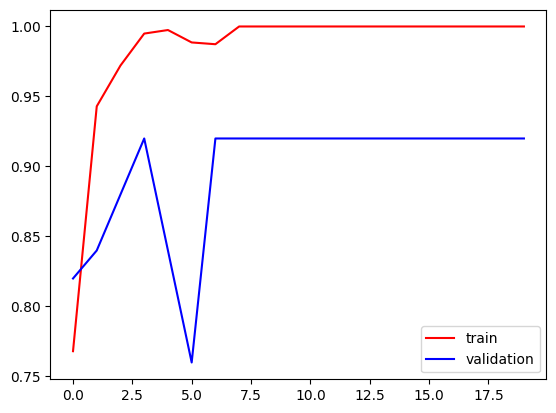

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

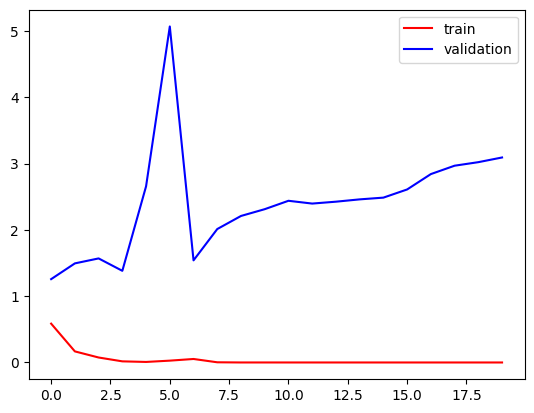

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 256 images belonging to 2 classes.


In [12]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

8/8 [==============================] - 31s 4s/step
[[1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.3982850e-16]
 [9.9740410e-01]
 [3.0068692e-10]
 [1.0000000e+00]
 [5.9374880e-19]
 [1.0000000e+00]
 [1.9404092e-06]
 [3.7292749e-02]
 [1.0000000e+00]
 [9.9990159e-01]
 [1.0000000e+00]
 [9.5596921e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.4259356e-26]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4069391e-09]
 [1.0000000e+00]
 [4.8045994e-09]
 [2.1845135e-26]
 [1.0000000e+00]
 [7.9158509e-14]
 [1.0000000e+00]
 [1.0000000e+00]
 [7.2351086e-10]
 [1.0000000e+00]
 [1.7121101e-09]
 [7.0635363e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.9927084e-13]
 [1.0000000e+00]
 [3.9443052e-03]
 [1.0000000e+00]
 [1.1393500e-03]
 [2.4355375e-22]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [2.6605543e-23]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [5.5290691e-20]
 [1.0163471e-25]
 [7.4501631e-06]
 [1.0000000e+00]
 [1.0000000e+0

In [13]:
len(predictions)

256

In [14]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[41 87]
 [46 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.32      0.38       128
           1       0.49      0.64      0.55       128

    accuracy                           0.48       256
   macro avg       0.48      0.48      0.47       256
weighted avg       0.48      0.48      0.47       256

